# Lab 1 

In [67]:
import scipy.stats

## A little statistics

### &nbsp;&nbsp;&nbsp;1. Converting a probability into a 'sigma'.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Reading (no code needed)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. Integrating the standard normal distribution

In [68]:
# Integral from -infinity to 0 PDF (Z = 0)
scipy.stats.norm.cdf(0)

0.5

In [69]:
# Integral from -infinity to 3 PDF (Z = 3)
scipy.stats.norm.cdf(3)

0.9986501019683699

In [70]:
# Integral from 0 to infinity PDF (Z = 0)
scipy.stats.norm.sf(0)

0.5

In [71]:
# Integral from 3 to infinity of PDF (Z = -3)
scipy.stats.norm.sf(3)

0.0013498980316300933

In [72]:
# Integral from -3 to 3 of PDF
1 - scipy.stats.norm.cdf(-3) - scipy.stats.norm.sf(3)

0.9973002039367398

In [73]:
# Integral from -infitity to -3 plus integral from 3 to infinity of PDF
scipy.stats.norm.cdf(-3) + scipy.stats.norm.sf(3)

0.0026997960632601866

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. Determine the associated 'sigma' value

In [74]:
# Sigma of a probability of 0.5
scipy.stats.norm.ppf(0.5)

0.0

In [75]:
# Sigma of a probability of 0.84134 (1 Sigma on Z-Table)
scipy.stats.norm.ppf(0.84134)

0.9999803859660787

In [76]:
# Sigma of a probability of 0.97725 (2 Sigma on Z-Table)
scipy.stats.norm.ppf(0.97725)

2.0000024438996027

In [77]:
# Sigma of a probability of 0.97725 (5 Sigma on Z-Table)
scipy.stats.norm.ppf(0.9999997133484281)

4.999999999970176

In [78]:
# Sigma of a probability of 0.97725 (-5 Sigma on Z-Table)
scipy.stats.norm.ppf(2.866515718791933e-07)

-5.000000000000001

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Explaination of negative Sigma

The negative sigma value indicates the endpoint for the integral to get the given area is to the left of the mean. For example, the endpoints of an integral that covers the an area of roughly 2.867e-07 of the PDF would go from -infinity to to -5 Sigma

### &nbsp;&nbsp;&nbsp; 2. Continuous analytic distributions

In [79]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

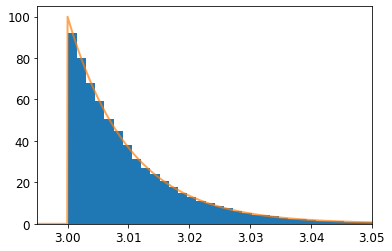

In [100]:
# Realization with ~100k samples
d = scipy.stats.gamma.rvs(1, loc = 3.0, scale = .01, size = 100000)

# Analytic PDF
fig, ax = plt.subplots(1, 1)
ax.hist(d,75, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([2.995,3.05])
x = np.linspace(2.995,3.05,1000)
ax.plot(x,scipy.stats.gamma.pdf(a = 1, x = x,loc = 3, scale = 0.01),linewidth = 2,alpha = 0.7)
plt.show()

### &nbsp;&nbsp;&nbsp;3. Determine the 'sigma'

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Hypothetical Value

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.042

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. The statistical question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What is the probability of reciving a signal of 3.042 or higher?

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; C. Mathematical integral

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\int\limits_{3.042}^\infty {\dfrac{x^{a-1}e^{-x}}{\Gamma \left( x \right)}dx}$

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Calculate the probability

In [107]:
# Porbability to see a signal of 3.042 or higher 
q = scipy.stats.gamma.sf(x = 3.042, a = 1, loc = 3, scale = 0.01)
q

0.014995576820477986

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; E. Equivalent 'sigma'

In [106]:
scipy.stats.gamma.ppf(q = q, a = 1, loc = 3, scale = 0.01)

3.0001510914728255

## Non-continuous distributions